<a href="https://colab.research.google.com/github/mosabbeer/Machine_Learning/blob/main/CarQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impooting the dependecies

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and Processing

In [141]:
#loading data from csv to pandas datafram
car_dataset=pd.read_csv('/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO.xls')

In [142]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [143]:
car_dataset.shape

(4340, 8)

In [144]:
#information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [145]:
#looking the missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [146]:
#statistical measures
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [147]:
#checking the distribution of the catagorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the catagorical data
means changing the text data to numatical data

In [148]:
#encoding the fuel data column
car_dataset.replace({
    'fuel':{
        'Petrol':0,
        'Diesel':1,
        'CNG':2,
        'LPG':3,
        'Electric':4
    }
},inplace=True)

/tmp/ipython-input-2589055168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [149]:
#encoding for seller_type data columns
car_dataset.replace({
    'seller_type':{
        'Individual':1,
        'Dealer':2,
        'Trustmark Dealer':3
    }
},inplace=True)

/tmp/ipython-input-2786641107.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [150]:
#encoding for trainmissin data columns
car_dataset.replace({
    'transmission':{
        'Manual':1,
        'Automatic':2
    }
},inplace=True)

/tmp/ipython-input-2759487312.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [151]:
#encoding for owner data columns
car_dataset.replace({
    'owner':{
        'First Owner':1,
        'Second Owner':2,
        'Third Owner':3,
        'Fourth & Above Owner':4,
        'Test Drive Car':5
    }
},inplace=True)


/tmp/ipython-input-1467917097.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [152]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,0,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [153]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


Spliting the data to traing and test data

In [154]:
x=car_dataset.drop(['name','selling_price'],axis=1)
y=car_dataset['selling_price']

In [155]:
x_tarin.dtypes

,0
year,int64
km_driven,int64
fuel,int64
seller_type,int64
transmission,int64
owner,object


In [156]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             1      1
1     2007      50000     0            1             1      1
2     2012     100000     1            1             1      1
3     2017      46000     0            1             1      1
4     2014     141000     1            1             1      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             1      2
4336  2014      80000     1            1             1      2
4337  2009      83000     0            1             1      2
4338  2016      90000     1            1             1      1
4339  2016      40000     0            1             1      1

[4340 rows x 6 columns]


In [157]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.1,random_state=2)

Training our Model

Linear Regression

In [159]:
#loading the linear regression
lin_reg_model=LinearRegression()

In [160]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model evaluation

In [161]:
#evaluation on traing data
training_data_prediction=lin_reg_model.predict(x_train)

In [162]:
# R square erroe
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R square error : ",error_score)

R square error :  0.43256302275062397


viasualize the actual price and predicted price

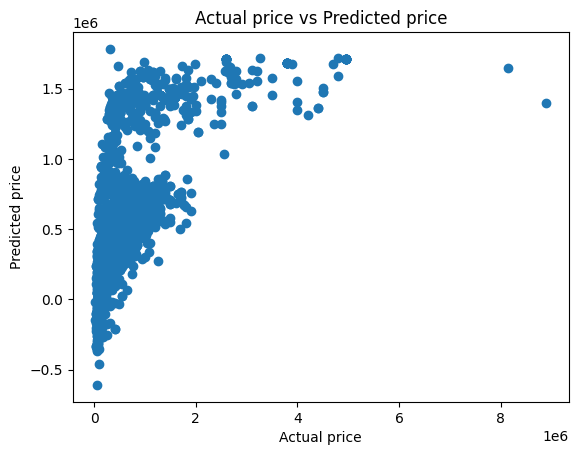

In [163]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()


In [164]:
#evaluation on test data
test_data_prediction=lin_reg_model.predict(x_test)

In [165]:
# R square erroe
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.5123159688209242


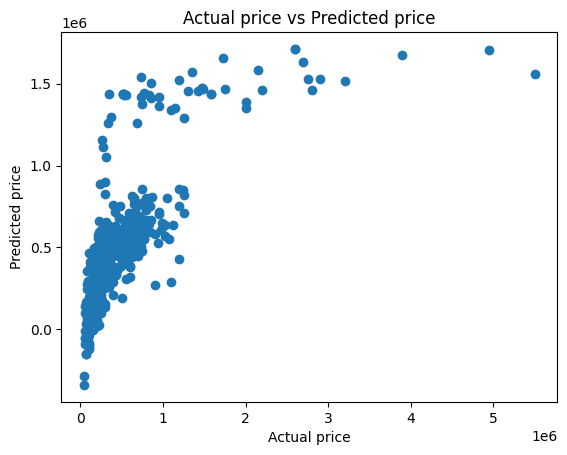

In [166]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

Lasso Regression

In [167]:
#loading the lesso regression
lass_reg_model=Lasso()

In [168]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model evaluation

In [169]:
#evaluation on traing data
training_data_prediction=lass_reg_model.predict(x_train)

In [170]:
# R square erroe
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R square error : ",error_score)

R square error :  0.4325630226975412


viasualize the actual price and predicted price

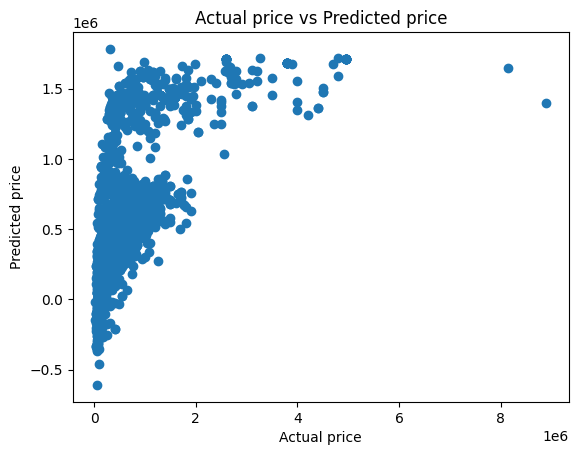

In [171]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()


In [172]:
#evaluation on test data
test_data_prediction=lass_reg_model.predict(x_test)

In [173]:
# R square erroe
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.5123152705700769


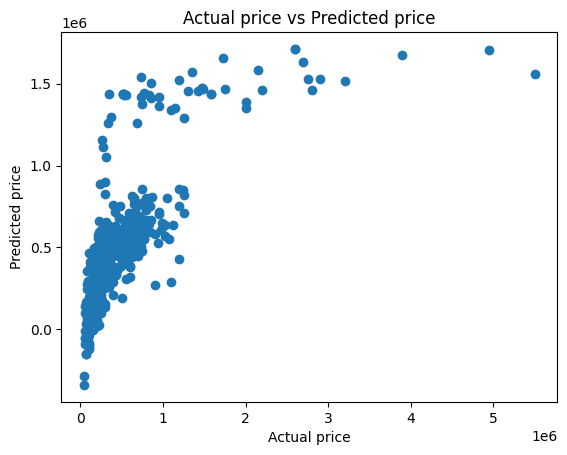

In [174]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()